In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn import preprocessing
from sklearn import metrics



file = pd.read_excel ('./Data/Data_Collection.xlsx')

In [3]:
x = pd.DataFrame(file, columns=['Births_Deaths', 'Migration', 'Population growth']).iloc[1:71]
y = pd.DataFrame(file, columns=['Population growth']).iloc[1:71]

In [4]:
year = pd.DataFrame(file, columns=['year']).iloc[1:71]
#year

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [13]:
scaler = preprocessing.StandardScaler()

sx_train = scaler.fit_transform(x_train)
sx_test = scaler.fit_transform(x_test)


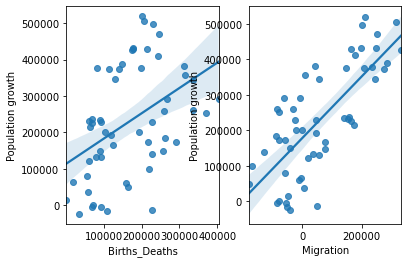

In [14]:
#plt.scatter(x_train[:,1], y_train)
#sns.regplot(x_train[:,1], y_train)

fig, axes = plt.subplots(ncols=2)
plt.subplot(1,2,1)
sns.regplot(x_train.iloc[:,0], y_train)
plt.subplot(1,2,2)
sns.regplot(x_train.iloc[:,1], y_train)

In [15]:
lr = LinearRegression()
lr.fit(sx_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
lr.intercept_

array([229549.03005074])

In [17]:
lr.coef_

array([[ 81557.77795666, 123307.8878331 ]])

In [18]:
y_pred = lr.predict(sx_test)


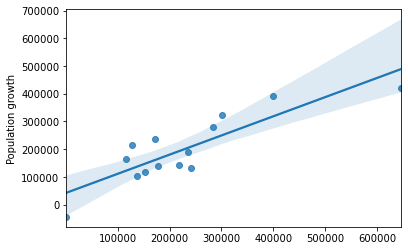

In [19]:

sns.regplot(y_pred, y_test)

In [20]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

80814.24388881968

In [21]:
#compare predicted numbers with actual numbes 
check = np.column_stack((y_test, y_pred))

In [46]:
pd.DataFrame(check, columns=['actual', 'predicted'])

,actual,predicted
0,103332.0,138270.238945
1,133561.0,242271.016966
2,216570.0,127395.136322
3,142105.0,217724.173474
4,164303.0,116638.990556
5,235233.0,172495.555386
6,420946.0,646008.376506
7,324940.0,300193.276300
8,137864.0,178480.593191
9,278601.0,284556.125658
